# Introduction to machine learning

*Maxime Sangnier*

Fall, 2021

## Practical session 2: kernel methods for classification and regression

# Table of contents
1. [Intuitive approach to SVM](#part1)
1. [Classification](#part2)
1. [Regression](#part3)
1. [Regression with precomputed kernel](#part4)
1. [Duality gap](#part5)


In [4]:
from mllab import *

# Intuitive approach to SVM <a id="part1"></a>


>The following expression enables to assess, in real time, the impact of a kernel and of the tradeoff parameter $C = \frac{1}{n\lambda}$.

In [ ]:
!python3 svm_gui.py


Libsvm GUI

A simple graphical frontend for Libsvm mainly intended for didactic
purposes. You can create data points by point and click and visualize
the decision region induced by different kernels and parameter settings.

To create positive examples click the left mouse button; to create
negative examples click the right button.

If all examples are from the same class, it uses a one-class SVM.


fit the model
fit the model
fit the model
fit the model
fit the model
fit the model
fit the model
fit the model
fit the model
fit the model
fit the model
fit the model
fit the model
fit the model
fit the model


>Make some tests with this GUI.
In particular, design
- linearly separable data / or not;
- unimodal classes / or not,

>and compare
- different kernels;
- different values for C and for hyperparameters (kernel parameters).

>For unimodal classes (first, linearly separable, then not), how do the margin and the frontiere behave with respect to $C$ (for a linear kernel) and to $\gamma$ (for a Gaussian kernel)?

>Are the values for these two parameters decisive for obtaining good classification rates?

**Answer:**
…

>Fit a linear classifier on unimodal (but not linearly separable) classes. Add some points one at a time.

>Determine three particular areas for the classifier.
How does the classifier react when adding a point in each area?

>What can we say about the dual variable $\alpha_i$ (associated to each point $X_i$) for each area?

**Answer:**
…

>Design a very unbalanced dataset (really more points in a class than in the other).
With a linear kernel, decrease gradually the value of $C$. What do you observe?

>This penomenon can be avoided with a class-dependent weighting of the data-fitting term (parameter `class_weight` of [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)).

**Answer:**
…

# Classification <a id="part2"></a>
>Let us consider the dataset defined below.

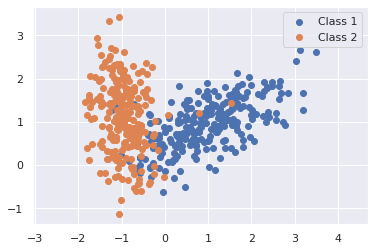

In [8]:
# Classification dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_classes=2,
                           n_features=2, n_redundant=0, n_clusters_per_class=1)

plotXY(X, y)

>Plot the decision frontieres of a [linear support vector classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for $C \in \{10^{-3}, \dots, 10^{2}\}$ (and store its classification accuray, also known as score).

In [ ]:
# Answer

>Plot the score vs the values of $C$.

In [ ]:
# Answer

>Determine the value of $C$ leading to the best score.

In [ ]:
# Answer

# Regression <a id="part3"></a>


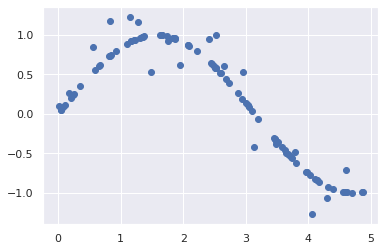

In [7]:
# Regression dataset
n = 100
X_train = np.sort(5 * np.random.rand(n))
y_train = np.sin(X_train)
y_train[::5] += 1 * (0.5 - np.random.rand(n//5))

X_test = np.arange(0, 5, step=1e-2)
y_test = np.sin(X_test)

# Make 2d-arrays
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

plt.scatter(X_train, y_train)

>What is an adequat value for the parameter $C$ of a [support vector regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) with a Gaussian kernel?

In [ ]:
# Answer

**Answer:**
…

>Plot on the same figure the training points and the prediction for the test set.

In [ ]:
# Answer

# Regression with precomputed kernel <a id="part4"></a>


>We focus here on molecule activity prediction.
For this purpose, we consider a molecule to be a graph, represented by a set of relations between its nodes (the atoms of the molecule).
Following these relations in a molecule $x$, we go over a path $p$ in the corresponding graph.
Let $\mathcal P_d$ be the set of all possible paths of length less than $d$ for the family of graph considered.
Let also $I(x, p)$ being $1$ if the path $p$ is in the molecule $x$ and $0$ otherwise.
Then, for two molecules $x$ and $x'$, we can define the similarity measure
$$
    u(x, x') = \sum_{p \in \mathcal P_d} I(x, p) I(x', p).
$$
The *Tanimoto kernel* is then defined by
$$
    k(x, x') = \frac{u(x, x')}{u(x, x) + u(x', x') - u(x, x')}.
$$

>Please, download the [dataset](https://drive.google.com/file/d/0B6VyRTVgbDFeWFFUUVRidUR3MFE/view?usp=sharing) in the directory `./data/` and run the following script to build the train and test kernel matrices.

In [10]:
path = "data/"

# Load the data
K = np.loadtxt(path + "/ncicancer_kernel_hf_ex0.txt") # Load the kernel
y = np.loadtxt(path + "/ncicancer_targets_ex0.txt")[:, 0] # Load the targets
y = (y-np.min(y)) / (np.max(y)-np.min(y)) # Scale the targets

# Split train/test sets
indices = np.random.permutation(K.shape[0])
train_idx, test_idx = indices[:K.shape[0]//4], indices[K.shape[0]//4:]
K_train = K[train_idx][:, train_idx]
y_train = y[train_idx]
K_test = K[test_idx][:, train_idx]
y_test = y[test_idx]

print("Number of training examples:", K_train.shape[0])
print("Number of test examples:", K_test.shape[0])

Number of training examples: 576
Number of test examples: 1729


>We would like to apply support vector regression.
Plot the training and test accuracies for $C=10^{-1}$ and different values of $\epsilon$ in $[10^{-3}, 10^{-1}]$.

In [ ]:
# Answer

>Do the same with kernel regularized regression.

In [ ]:
# Answer

>Given the kernel matrices for training and testing, give the best possible accuracy on the test sample with a kernel machine.
The testing data should not intervene in fitting the model.

In [ ]:
# Answer

>Compare to regularized regression with kernels.

In [ ]:
# Answer

# Duality gap <a id="part5"></a>


In [15]:
# Dataset
import numpy as np
from sklearn.datasets import load_digits

X, Y = load_digits(return_X_y=True)
Y[Y<5] = 1  # Class 1: digits 1, …, 4
Y[Y>4] = -1  # Class -1: digits 5, …, 9

ind = np.random.permutation(X.shape[0])[:X.shape[0]//4]
X = X[ind]
Y = Y[ind]

print("Digits dataset:")
print("X shape:", X.shape)
print("Labels:", Y.min(), Y.max())

Digits dataset:
X shape: (449, 64)
Labels: -1 1


>After being fitted, the object [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) has many interesting attributes:
- `coef_` (1 x #features): is the vector defining the Riesz representation (primal coefficients);
- `intercept_` (1): is the model intercept;
- `support_` (#support vectors): is the array of indexes of the support vectors;
- `dual_coef_` (1 x #support vectors): is the array of non-zero signed dual variables (that is $y_i \alpha_i$).

>Write a function, called `primal_dual(clf, X_train, y_train)`, that given a classifier object, a data matrix, and a label array, fits the classifier and returns the tuple `(primal, dual)` of primal and dual objective values.
Check, on the dataset previously loaded, that the primal and the dual objectives are close to each other.

In [ ]:
# Answer

>How does the duality gap (difference between primal and dual objectives) behave with respect to the optimization tolerance (parameter `tol` of [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))?
To anwser, plot the gap with respect to the tolerance in x-log-scale.

In [ ]:
# Answer